# Statistics tutorial 1 (PDF, CDF, ICDF)

## PDF (Probability Density Function)

Definition: The probability density function (PDF) of a continuous random variable is a function that describes the relative likelihood for this random variable to take on a given value.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import integrate


In [5]:
# 1. Write Python function for PDF.
import numpy as np
def gaussian_pdf(x, mean, std_dev):
    coefficient = 1/(std_dev * np.sqrt(2 * np.pi))
    exponent = -(((x - mean) ** 2)/std_dev **2)/2
    pdf = coefficient * np.exp(exponent)
    return pdf
# Get some data using the above functions.

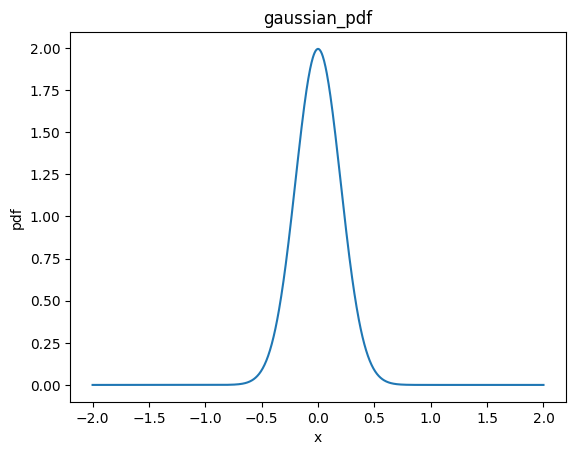

In [7]:
# input
x = np.linspace(-2, 2, 1000)
mean = 0
std_dev = 0.2

pdf_values = gaussian_pdf(x, mean, std_dev)

plt.plot(x, pdf_values)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('gaussian_pdf')
plt.show()

In [13]:
# cdf
def gaussian_cdf(x, mean, std_dev):
    cdf_values = np.zeros_like(x)
    for i, val in enumerate(x):
        cdf, _ = integrate.quad(gaussian_pdf, -np.inf, val, args=(mean, std_dev))
        cdf_values[i] = cdf

    return cdf_values

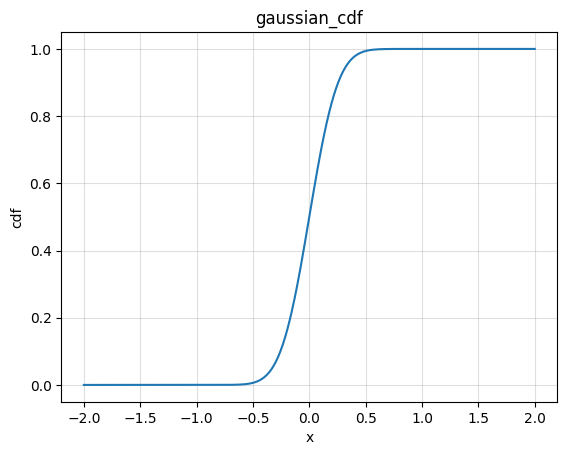

In [19]:
# x = np.linspace(-2, 2, 1000)
# mean = 0
# std_dev = 0.2
# cdf_values = gaussian_cdf(x, mean, std_dev)

plt.plot(x, gaussian_cdf(x, mean, std_dev))
plt.xlabel('x')
plt.ylabel('cdf')
plt.title('gaussian_cdf')
plt.grid(alpha=0.4)
plt.show()

In [25]:
# interpolation of cdf
from scipy.interpolate import interp1d

x = np.linspace(-2, 2, 1000)
mean = 0
std_dev = 0.2
cdf_values = gaussian_cdf(x, mean, std_dev)

cdf_new = interp1d(x, cdf_values)

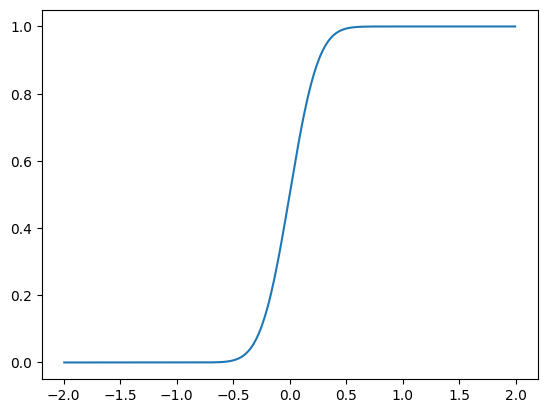

In [29]:
x_new = np.sort(np.random.uniform(-2, 2, 1000))

plt.plot(x_new, cdf_new(x_new))

In [30]:
# inverse cdf
icdf_new = interp1d(cdf_values, x)

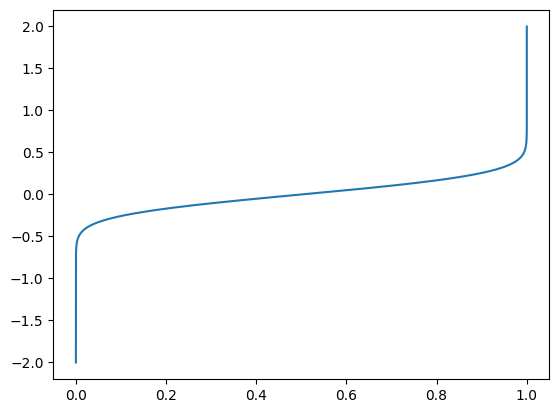

In [33]:
# plot
x = np.linspace(-2, 2, 1000)
mean = 0
std_dev = 0.2
cdf_values = gaussian_cdf(x, mean, std_dev)

plt.plot(cdf_values, icdf_new(cdf_values))


In [43]:
# inverse transform sampling
u = np.random.uniform(0, 1, 10000)
x = icdf_new(u)

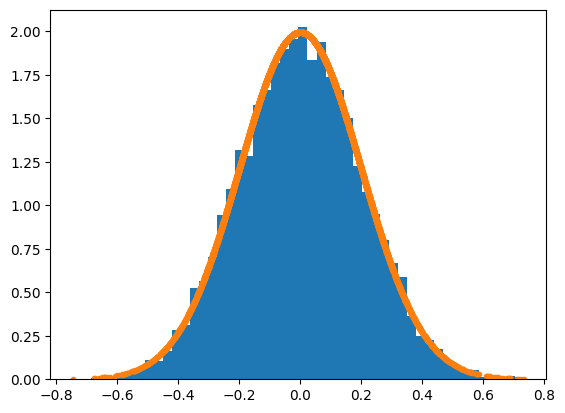

In [44]:
# histogram
plt.hist(x, bins=50, density=True)
plt.plot(x, gaussian_pdf(x, mean, std_dev), '.')